##**Exploratory Data Analysis**


**After getting our data preprocessing ready, we nevertheless need to make experience of it. In EDA we examine numerous plots and in reality allow the statistics information for better analysis. This step will provide us a deeper expertise of statistical understanding.** 

Lets import required packages and load data

In [0]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import matplotlib.pyplot as plt

import collections
import re, string
import sys
import time
from nltk.corpus import stopwords
from wordcloud import WordCloud
#from mpl_toolkits.basemap import Basemap

from subprocess import check_output
%matplotlib inline

In [0]:
%pip install geopandas

     |████████████████████████████████| 1.0 MB 7.5 MB/s 
     |████████████████████████████████| 6.3 MB 43.9 MB/s 
     |████████████████████████████████| 16.7 MB 7.6 MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
%cd /content/drive/MyDrive/univ.ai ds project/dataset

/content/drive/.shortcut-targets-by-id/1I7TbzU8yo1WEAUGtZ-xYjgUJzEawBmXe/univ.ai ds project/dataset


In [0]:
#files in the drive:
%ls

business.csv                review_2.csv          RML-01.h5   tip.csv
bus_updated.csv             review_sentiment.csv  RML.h5      tip_updated.csv
Dataset_User_Agreement.pdf  RM01.h5               RMnl301.h5  user.csv
final_review.csv            RM02.h5               RMnlff.h5   user_updated.csv
item_user.csv               RM03.h5               RMnlf.h5    yelp_database.db


##**BUSINESS TABLE INSIGHT WITH PLOTS:**

In [0]:
#read the csv file
yelp_business= pd.read_csv('business.csv')
yelp_business.head()

business_id  ...                                              hours
0  6iYb2HFDywm3zjuRg0shjw  ...  {'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...
1  tCbdrRPZA0oiIYSmHG3J0w  ...  {'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ...
2  bvN78flM8NLprQ1a1y5dRg  ...  {'Thursday': '11:0-18:0', 'Friday': '11:0-18:0...
3  oaepsyvc0J17qwi8cfrOWg  ...                                                NaN
4  PE9uqAjdw0E4-8mjGl3wVA  ...  {'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'...

[5 rows x 14 columns]

In [0]:
business_df =pd.read_csv("bus_updated.csv")
business_df.head()

Unnamed: 0  business_id  ...   Saturday     Sunday
0           0            0  ...  11:0-23:0  11:0-23:0
1           1            1  ...   5:0-18:0   5:0-18:0
2           5            5  ...  11:0-22:0      False
3           7            7  ...   7:0-22:0   7:0-22:0
4          10           10  ...  6:30-22:0  6:30-20:0

[5 rows x 58 columns]

In the dataset **business_df**, we have preprocessed the attribute columns and added the important features in individual columns




Terminology used:
1. __Top reviewed business__ : Business with most numbers of positive reviews
1. __Negatively reviewed business__ : Business with most numbers of negative reviews
1. __Trending business__ : Business with most number of reviews, with more than 4 stars in recent years
1. __Positive review__ : Review with more than 3 stars
1. __Negative review__ : Review with just 1 star

# Top reviewed business

**Top 5 star-rated Restuarants sorted by review count**

[Text(0, 0.5, 'Review Count'), Text(0.5, 0, 'Restaurant')]

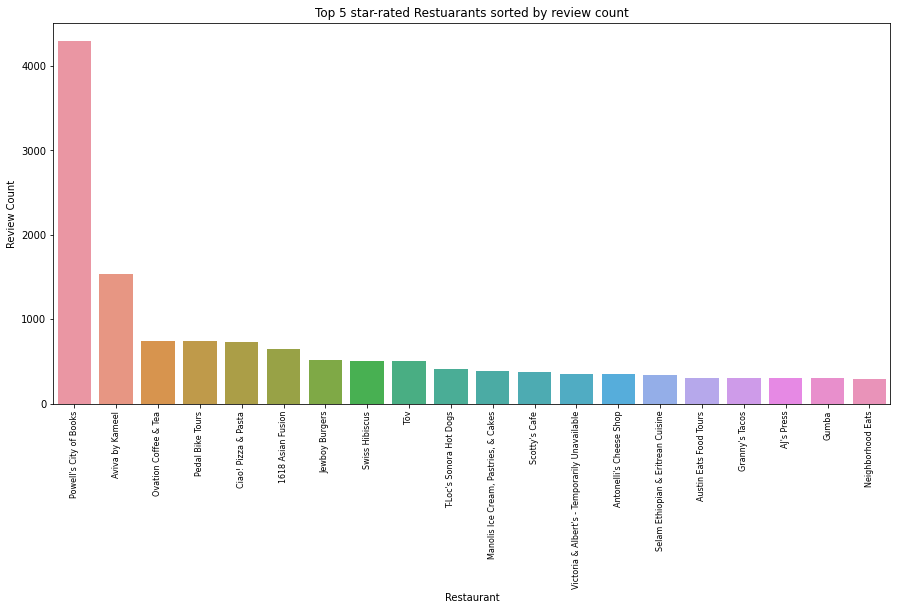

In [0]:
toprating_df = business_df[business_df["stars"]==5]
toprating_df = toprating_df.sort_values('review_count', ascending=False).head(20)

plt.figure(figsize=(15,7))
p = sns.barplot(x='name', y="review_count", data=toprating_df,)
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 8)
p.set_title("Top 5 star-rated Restuarants sorted by review count")
p.set(xlabel="Restaurant", ylabel="Review Count")

This graph shows the top 5-stared restuarants with the review count.for Powells city of books the review count is drastically high above 4000. 

Restuarants sorted by  minimum review count

"Top 5 star-rated Restaurants sorted by mean of ratings

[Text(0, 0.5, 'Rating'), Text(0.5, 0, 'Restaurant')]

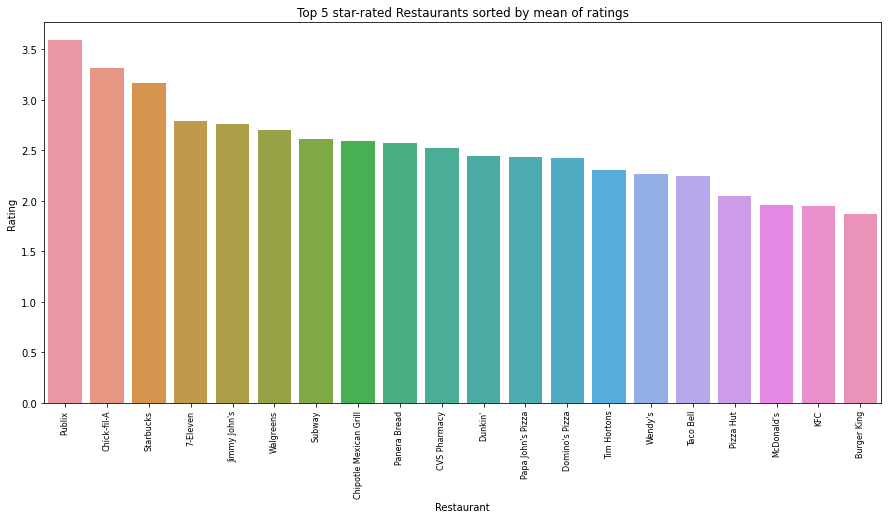

In [0]:
df_restaurants = business_df.name.value_counts().index[:20].tolist()
df_top = business_df.loc[business_df['name'].isin(df_restaurants)]
mean_df = df_top.groupby('name')['stars'].mean()
meanrating_df = mean_df.reset_index()
topmean_rating_df = meanrating_df.sort_values('stars', ascending=False).head(20)

plt.figure(figsize=(15,7))
p = sns.barplot(x='name', y="stars",data=topmean_rating_df)
ax = plt.gca()
p.set_xticklabels(p.get_xticklabels(), rotation = 90, fontsize = 8)
p.set_title("Top 5 star-rated Restaurants sorted by mean of ratings")
p.set(xlabel="Restaurant", ylabel="Rating")


The plot show the top 5 star rated resturants that sorted by mean of ratings and rubix get the top rating .

##Which location the business were located in the world map?

Text(0.5, 1.0, 'BUSINESS DISTRIBUTION ON WORLD MAP')

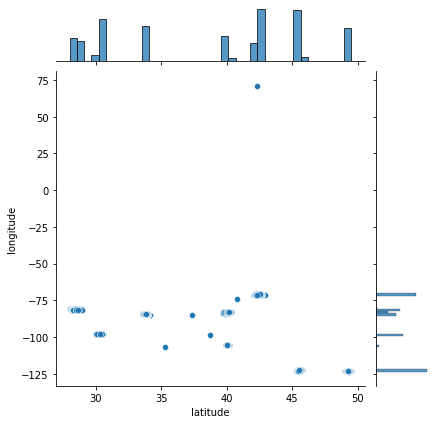

In [0]:
sns.jointplot(data=yelp_business, x='latitude', y='longitude')
ax.set_title("BUSINESS DISTRIBUTION ON WORLD MAP")

We see that locations of businesses are concentrated in clusters. These clusters must be big cities. Lets plot these on a map.

[Text(17.200000000000017, 0.5, 'latitude'),
 Text(0.5, 17.200000000000003, 'longitude')]

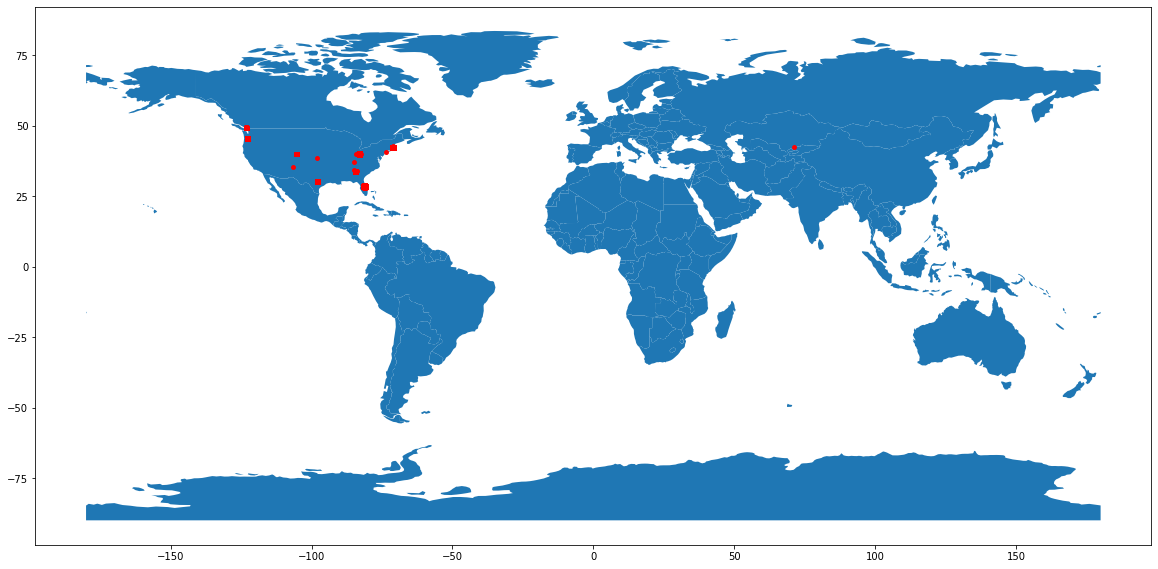

In [0]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame



geometry = [Point(xy) for xy in zip(yelp_business['longitude'], yelp_business['latitude'])]
gdf = GeoDataFrame(yelp_business, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

ax.set_title("BUSINESS DISTRIBUTION ON WORLD MAP")
gdf.plot(ax=world.plot(figsize=(20, 12)),marker='o', color='red', markersize=15)
ax.set(xlabel="longitude", ylabel = "latitude")

This is a 2d plot for the location of business distribution across the world.this plot shows that the dataset has the bussiness from north america,there is a also outlier spoted in the graph.

In [0]:
import plotly.express as px
import pandas as pd
fig = px.scatter_geo(yelp_business,lat='latitude',lon='longitude', hover_name="city")
fig.update_layout(title = 'BUSINESS DISTRIBUTION ON WORLD MAP', title_x=0.5)
fig.show()

This plot show 3d visulization of the business distrubution across the world.the outlier we found to be in jumaica plain.

**Total count of restruant is_open:**

Text(0.5, 1.0, 'Total count of restruant is_open:')

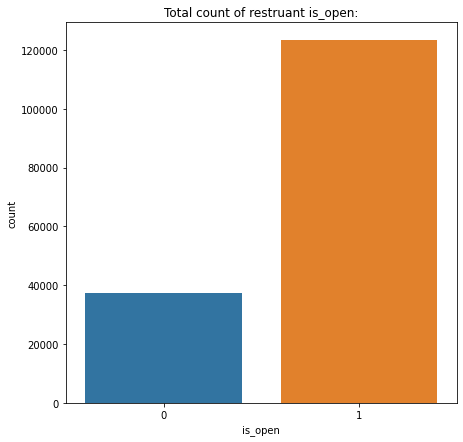

In [0]:
plt.figure(figsize=(7,7))
ax = sns.countplot(x="is_open", data=yelp_business)
plt.title("Total count of restruant is_open:")

Mostly the review count say that resturants are open . according to the dataset 40,000 resturants are closed .

#Trend of Atributes in the resturant based on star ratings

Trend of happy hours in the resturant based on star ratings

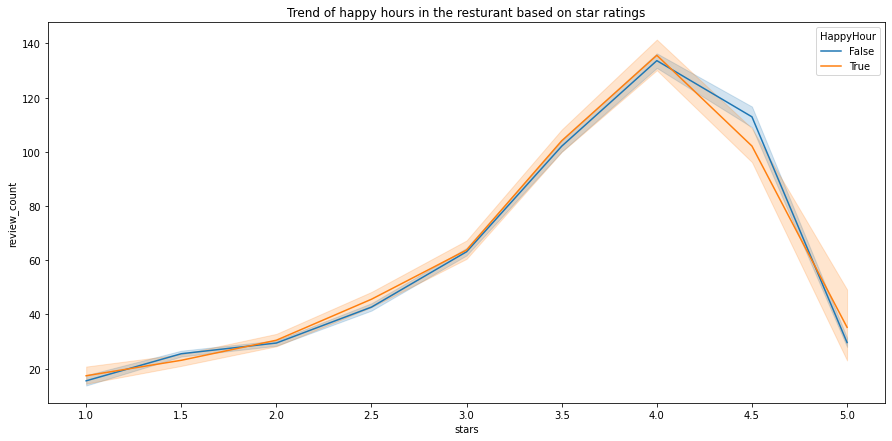

In [0]:
plt.figure(figsize=(15,7))
sns.lineplot(x=business_df["stars"],y=business_df["review_count"],hue=business_df['HappyHour'],ci=80)
plt.legend(bbox_to_anchor=(1.00, 1), title ='HappyHour')
plt.title("Trend of happy hours in the resturant based on star ratings")
plt.show()


Happy hours  tells us that  how good enviroment  in the resturant. The true count gives the no of restruants satisfies the happy hour attribute spent on the resturant. 

Trend of ambience_romantic in the resturant based on star ratings

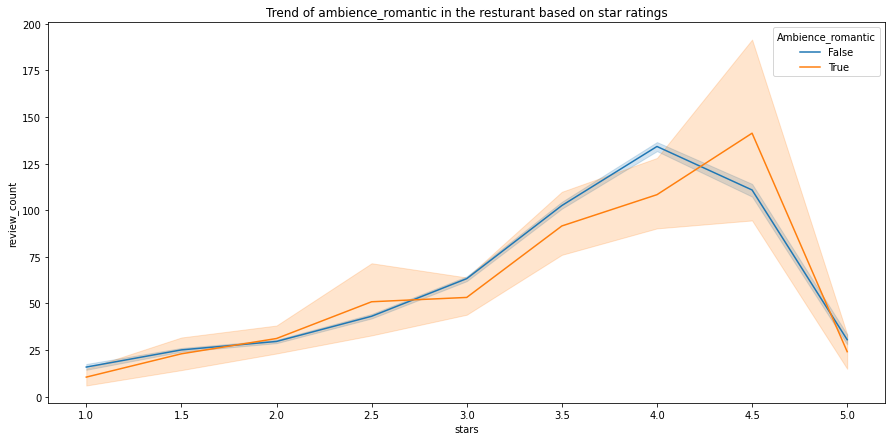

In [0]:
plt.figure(figsize=(15,7))
sns.lineplot(x=business_df["stars"],y=business_df["review_count"],hue=business_df['Ambience_romantic'],ci=80)
plt.legend(bbox_to_anchor=(1.00, 1), title ='Ambience_romantic')
plt.title("Trend of ambience_romantic in the resturant based on star ratings")
plt.show()

Trend of ambience_romantic in the resturant based on star ratings shows that the place where couples prefer to stay like candle light dinner and how far the resturant

Most Popular Zip codes

Text(0, 0.5, 'Count')

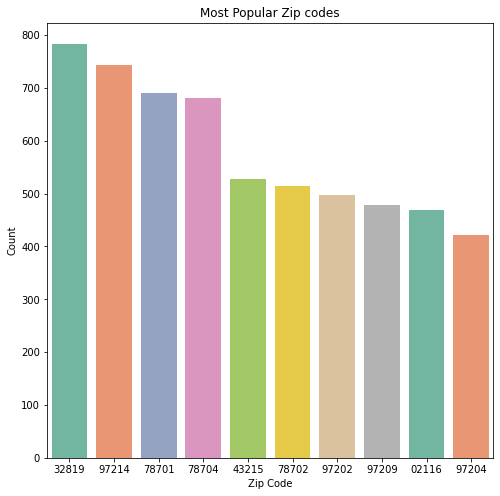

In [0]:
plt.figure(figsize=(8,8))
top_10_zip = business_df["postal code"].value_counts()[:10]
sns.barplot(x=top_10_zip.index, y=top_10_zip.values,palette=sns.color_palette("Set2"))
ax = plt.gca()
ax.set_title('Most Popular Zip codes')
ax.set_xlabel('Zip Code')
ax.set_ylabel('Count')


##Top reviewed business

In [0]:
top_reviewed = yelp_review[yelp_review["stars"]>3]
top_reviews_dict ={}

for business_id in top_reviewed["business_id"].values:
    try :
        top_reviews_dict[business_id] =top_reviews_dict[business_id]+1
    except:
        top_reviews_dict[business_id]=1
        
topbusiness = pd.DataFrame.from_dict(data= top_reviews_dict,orient="index")

topbusiness.reset_index(inplace=True)
topbusiness.columns = ['business_id', 'rated']
del(top_reviews_dict)
del(top_reviewed)

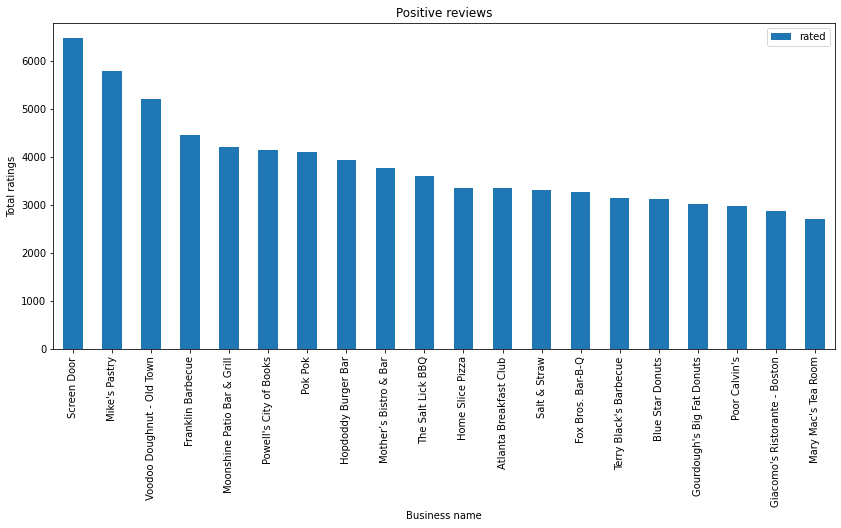

In [0]:
top_count= 20
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

top_business_data = pd.merge(topbusiness,right=right, how="inner",on='business_id')
top_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Positive reviews').set_ylabel("Total ratings")

del(topbusiness)
del(right)

In this we consider the star rating above 3 to be positive ratings and have positive reviews with insight that restruants are mostly liked by people.these are top business name

# How businesses are getting reviewed over time


Some businesses try to maintain their overall quality standards and make their customers happy. Lets see which businesses are maintaining their quality standards  based on positive reviews.

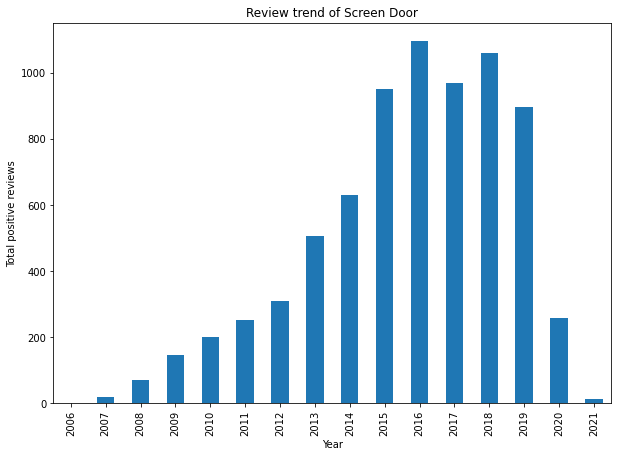

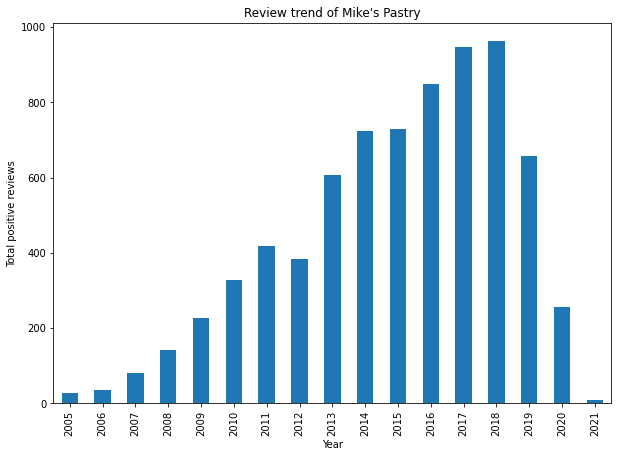

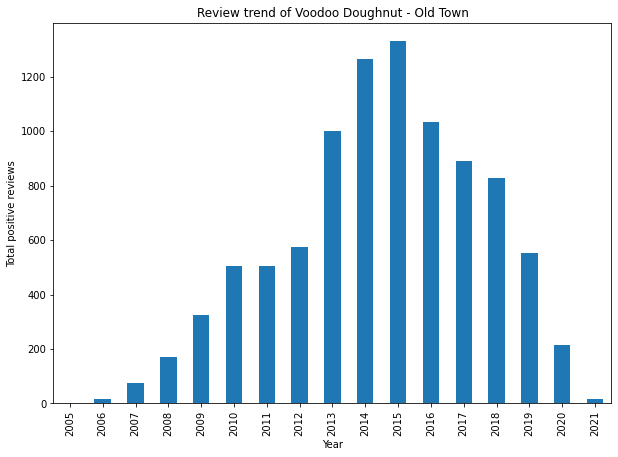

In [0]:
num_business = 3
business_ids = top_business_data.sort_values("rated")[::-1][:num_business].business_id.values
business_names = top_business_data.sort_values("rated")[::-1][:num_business]["Business name"].values
for i, business_id in enumerate(business_ids):
    useful_b = yelp_review.loc[yelp_review['business_id'] == business_id]
    useful_b = useful_b.groupby(['year']).size().reset_index(name='counts')
    #print(useful_b.head())
    series = pd.Series(useful_b["counts"].values, index=useful_b["year"].values, name='Review trend')
    axes = series.plot(kind="bar",figsize=(10, 7))
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total positive reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_names[i]), axes=axes)
    plt.show()


Based on above graphs one can see that positive reviews of "screen door" is dropping this can mean either people are not visiting "screen door" or quality standards of this business is definitely dropping over time.



# Most recent Trending businesses

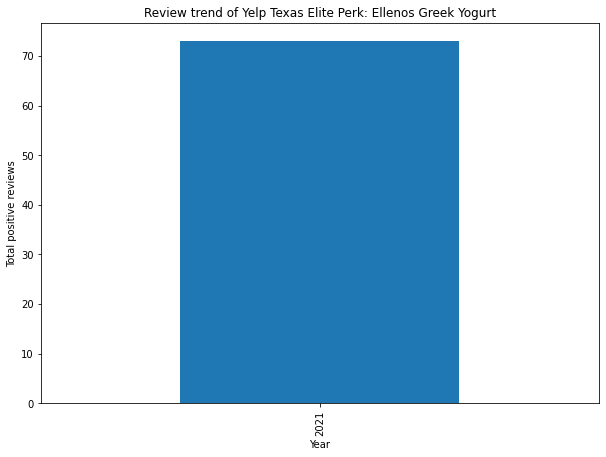

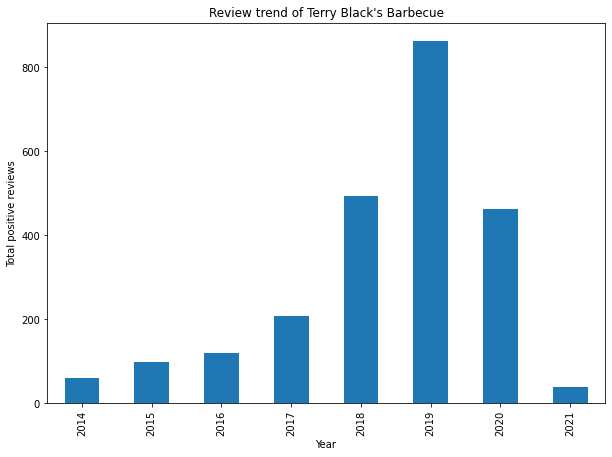

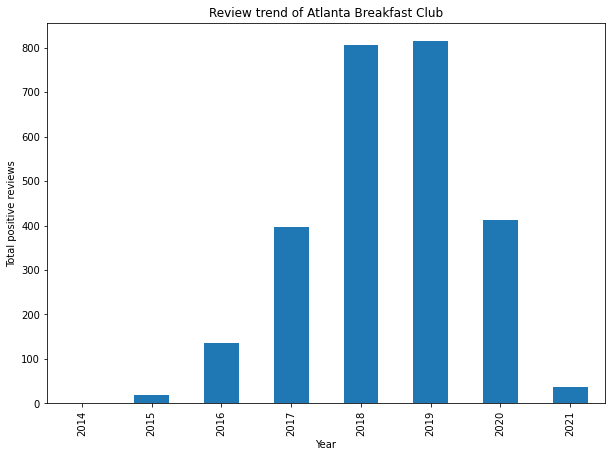

In [0]:
top_business = 3
temp = yelp_review[["business_id",'year',"stars"]]
five_star_reviews = temp[temp["stars"]>4]
trending_business_reviews = five_star_reviews.groupby(["business_id",'year']).size().reset_index(name='counts')

trending = trending_business_reviews.sort_values(['year','counts'])[::-1][:top_business].business_id.values
for  business_id in trending:
    record = trending_business_reviews.loc[trending_business_reviews['business_id'] == business_id]
    business_name = yelp_business.loc[yelp_business['business_id'] == business_id].name.values[0]
    series = pd.Series(record["counts"].values, index=record.year.values, name='Trending business')
    axes = series.plot(kind="bar",figsize=(10, 7))
    plt.xlabel('Year', axes=axes)
    plt.ylabel('Total positive reviews', axes=axes)
    plt.title('Review trend of {}'.format(business_name), axes=axes)
    plt.show()
    #len(trending_business_reviews)

From above graphs one can easliy see that "yelp texas elite park ellens greek yogurt" is new commer in business and has got most reviews in year 2021. And "terry black barbecue" is able to maintain it reviews which indicate persistant quality standards.  although there are some  decline its due to the covid pandameic suitation.

.

# Categories of top reviewed businesses

This section can answer the question "What categories of businesses are at succeeding?" Good reviews means customers are happy to visit and take time to write reviews.

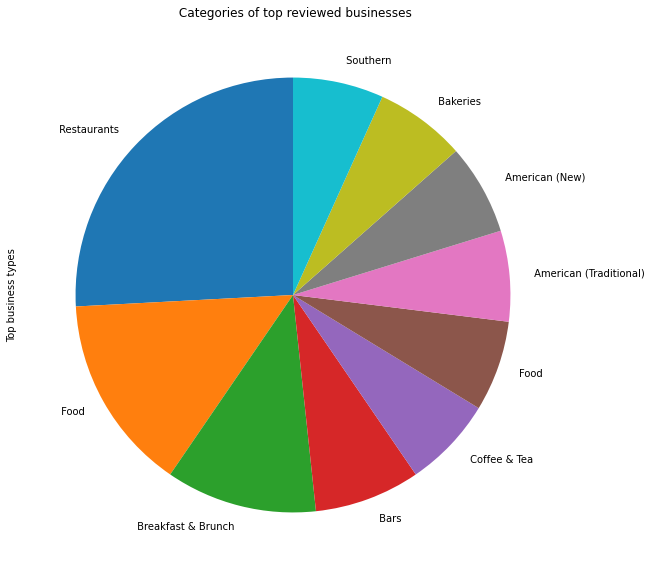

In [0]:
num_cat =10 # to show top 10 catrgories
top_business = 30 # choose categories of top 30 businesses
cat_data = top_business_data.sort_values("rated")[::-1][:top_business]
#cat_data.categories
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90,title=' Categories of top reviewed businesses')




These are categories segment which hves high ratings,A new business in these catergories can be profitable if we were able to maintain a good quality with high demand.

# Categories of trending businesses

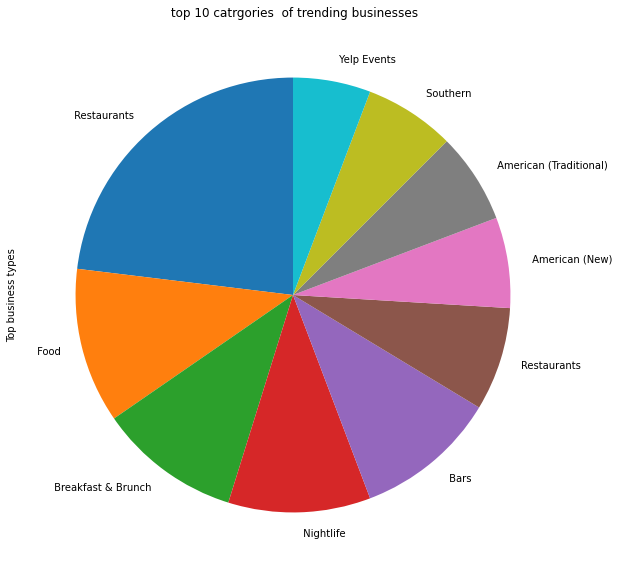

In [0]:
num_cat =10 # to show top 10 catrgories
top_business = 40 # choose categories of top 30 businesses
business_ids = trending_business_reviews.sort_values(['year','counts'])[::-1][:top_business].business_id.values
cat_data = top_business_data.loc[top_business_data['business_id'].isin(business_ids)]
#cat_data.categories
Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
top_categories.reset_index(inplace=True)
top_categories.columns = ['category', 'occurance']

x_val=top_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=top_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Top business types')
series.plot.pie(figsize=(10, 10),startangle=90,title=' top 10 catrgories  of trending businesses')


By comparing above two pie chart one can say "ASIAN FUSION " is  a trending category of business but not getting higher review, if were able to tap customer demand in this section we can earn huge profit .

# Negatively reviewed businesses

In [0]:
bottom_reviewed = yelp_review[yelp_review["stars"]<2]
bottom_reviews_dict ={} 

for business_id in bottom_reviewed["business_id"].values:
    try :
        bottom_reviews_dict[business_id] =bottom_reviews_dict[business_id]+1
    except:
        bottom_reviews_dict[business_id]=1
        
bottombusiness = pd.DataFrame.from_dict(data= bottom_reviews_dict,orient="index")

bottombusiness.reset_index(inplace=True)
#bottombusiness.head()
bottombusiness.columns = ['business_id', 'rated']

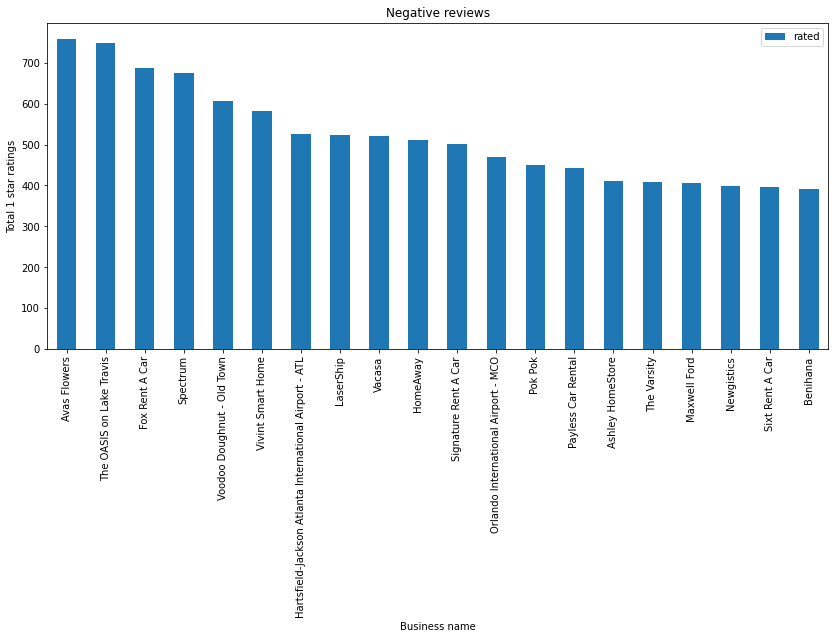

In [0]:
top_count= 20
right=pd.DataFrame(yelp_business[['business_id',"name","categories"]].values,
                    columns=['business_id',"Business name","categories"])

bottom_business_data = pd.merge(bottombusiness,right=right, how="inner",on='business_id')
bottom_business_data.sort_values("rated")[::-1][:top_count].plot(x="Business name",y="rated", 
                                                   kind="bar",figsize=(14,6),
                                                   title='Negative reviews').set_ylabel("Total 1 star ratings")

del(bottom_reviewed)
del(bottom_reviews_dict)
del(bottombusiness)
del(right)


Above plot shows that  "economy rent a car" is most  negatively reviewed.we dont think investing in this bussiness is good option because of a psychological bias of customer towards the item no matter how good functionality it offers.

for example, no matter how good featues an application posess from china but we indian will boycott it due to sentiments againt the china.



# Business categories which needs improvement

The categories of businesses which which are getting negative reviews definitely need to improve their services. Or this insight can be used by their competitors to start new business nearby.

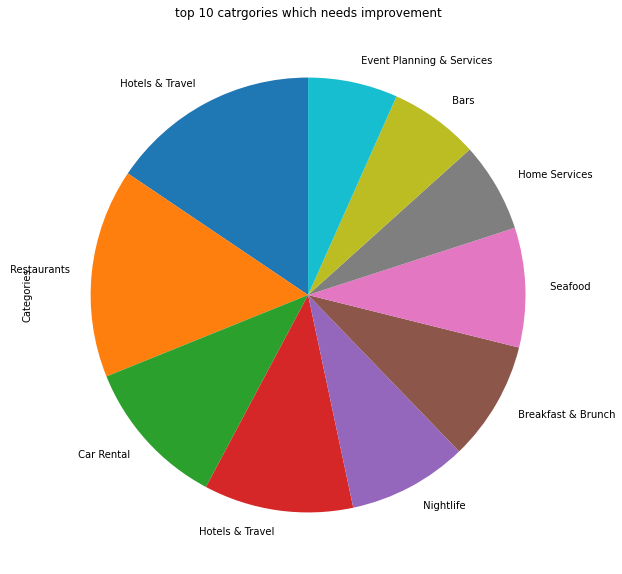

In [0]:
num_cat =10 # to show top 10 catrgories
bottom_business = 30 # choose categories of top 30 businesses
cat_data = bottom_business_data.sort_values("rated")[::-1][:bottom_business]

Categories={}
for cat in cat_data.categories.values:
    all_categories= cat.split(",")
    for x in all_categories:
        try :
            Categories[x] =Categories[x]+1
        except:
            Categories[x]=1
bottom_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
bottom_categories.reset_index(inplace=True)
bottom_categories.columns = ['category', 'occurance']

x_val=bottom_categories.sort_values("occurance")[::-1][:num_cat].occurance.values
labels=bottom_categories.sort_values("occurance")[::-1][:num_cat].category.values
series = pd.Series(x_val, index=labels, name='Categories')
series.plot.pie(figsize=(10, 10),startangle=90,title='top 10 catrgories which needs improvement')



##REVEIW TABLE INSIGHT WITH PLOTS:

In [0]:
# let us import the dataset for review
yelp_review= pd.read_csv('final_review.csv')

Lets get the overview of reviews.

In [0]:
yelp_review.head()

Unnamed: 0               review_id  ...                 date review_score
0           0  lWC-xP3rd6obsecCYsGZRg  ...  2014-10-11 03:34:02       0.9950
1           1  8bFej1QE5LXp4O05qjGqXA  ...  2015-07-03 20:38:25       0.9966
2           2  NDhkzczKjLshODbqDoNLSg  ...  2013-05-28 20:38:06       0.9705
3           3  T5fAqjjFooT4V0OeZyuk1w  ...  2010-01-08 02:29:15      -0.4386
4           4  sjm_uUcQVxab_EeLCqsYLg  ...  2011-07-28 18:05:01       0.9359

[5 rows x 10 columns]

In [0]:
# we will add separate columns for date with features added seperately.
yelp_review["date"]=  pd.to_datetime(yelp_review["date"], format='%Y-%m-%d')
yelp_review['year'] = yelp_review.date.dt.year
yelp_review['day'] = yelp_review.date.dt.day
yelp_review['month'] = yelp_review.date.dt.month
yelp_review['year'] = yelp_review.date.dt.year
yelp_review['hour'] = yelp_review.date.dt.hour
yelp_review['minute'] = yelp_review.date.dt.minute
yelp_review['second'] = yelp_review.date.dt.second

yelp_review.head()


Unnamed: 0               review_id  ... minute second
0           0  lWC-xP3rd6obsecCYsGZRg  ...     34      2
1           1  8bFej1QE5LXp4O05qjGqXA  ...     38     25
2           2  NDhkzczKjLshODbqDoNLSg  ...     38      6
3           3  T5fAqjjFooT4V0OeZyuk1w  ...     29     15
4           4  sjm_uUcQVxab_EeLCqsYLg  ...      5      1

[5 rows x 16 columns]

##SENTIMENT ANALYSIS WITH POLARITY SCORE

Text(-12.648763020833336, 0.5, 'count')

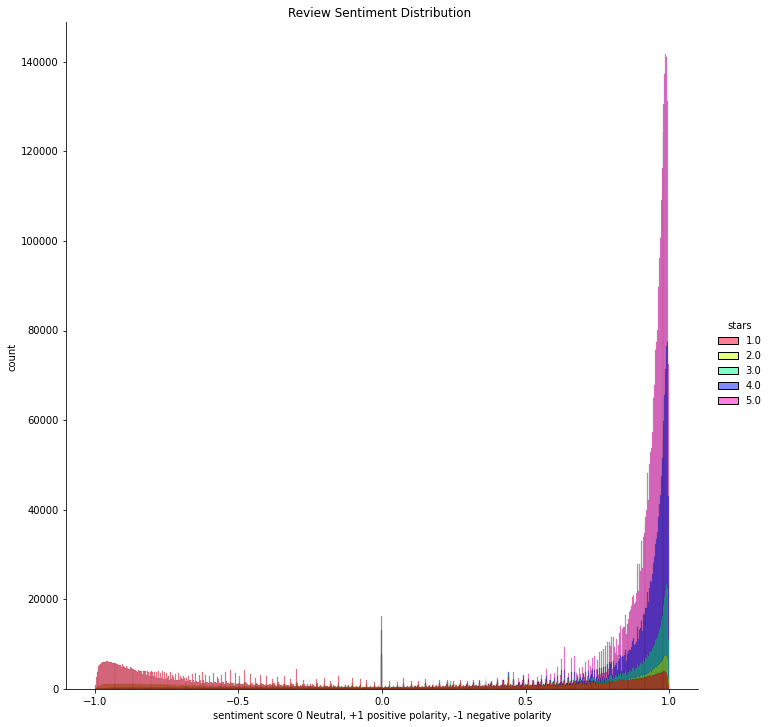

In [0]:
sns.displot(data=yelp_review, x='review_score',hue='stars',height=10, palette=sns.color_palette("gist_rainbow", as_cmap=True))
ax = plt.gca()
ax.set(xticks=[-1,-0.5,0,0.5,1])
ax.set(title="Review Sentiment Distribution ")
plt.yticks(va='center')
# This will add label to the X-axis
ax.set_xlabel( "sentiment score 0 Neutral, +1 positive polarity, -1 negative polarity")
# This will add label to the Y-axis
ax.set_ylabel( "count")

In this graph, we plotted the polarity of sentiments from reviews ranging from -1 (Negative)  to +1 (positive), we can see that more of the people have given positive reviews than negative review. We also hued them with ratings and found that most of the reviews are aligned with the reviews but there are some outliers (where reviews are not aligned to the rating)

TOTAL STAR DISTRIBUTION FOR REVIEW COUNT

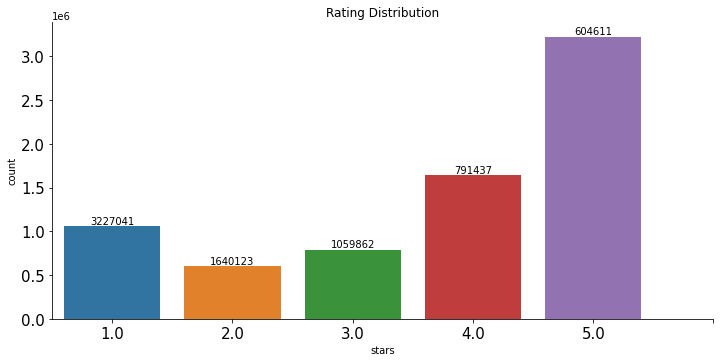

In [0]:
sns.catplot(data=yelp_review, x='stars', kind='count', aspect=2)
ax = plt.gca()
ax.set(xticks=[0,1,2,3,4,5], title='Rating Distribution')
ax.tick_params('x', labelsize=15)
ax.tick_params('y', labelsize=15)
rects = ax.patches
labels = yelp_review["stars"].value_counts()
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

 This graph shows that distribution  count for 1-5 star ratings.We infer that distribution of rating for stars 5 is high. Its seen that mostly people tend to give higher stars to a product.

Number of reviews by Year

Text(0.5, 1.0, 'Number of reviews by Year')

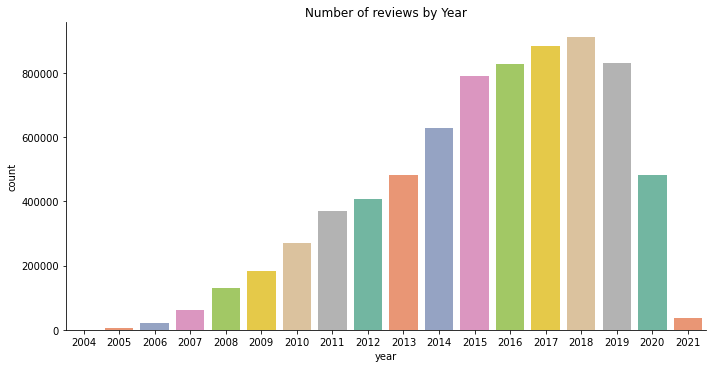

In [0]:
g = sns.catplot(data=yelp_review, x='year', kind='count', aspect=2,palette=sns.color_palette("Set2"))
ax = plt.gca()
ax.set_title('Number of reviews by Year')

This graph shows number of reviews increased exponentially over the years. This could also be an evidence for yelp's popularity over the years.and also we see in year 2020 and 2021 it has decreased rapidily due to covid pandemic suitation.

TREND OF RATINGS WITH  MONTH 

Text(0.5, 1.0, 'Ratings by Month')

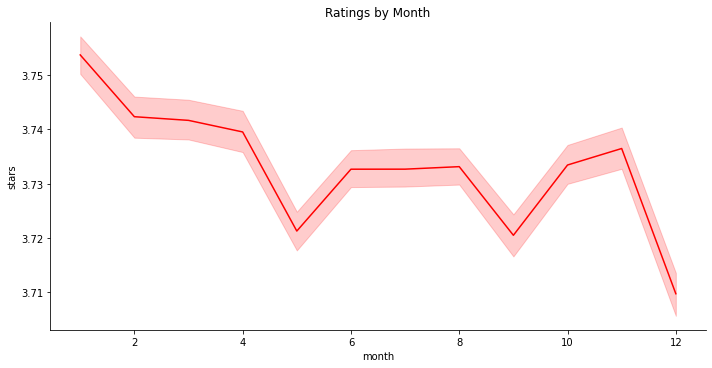

In [0]:
g = sns.relplot(data=yelp_review, x='month', y='stars', aspect=2, kind='line',color='r')
ax = plt.gca()
ax.set_title('Ratings by Month')

We infer from the graph that  people in america tend to review the average rating lies around (3.71 -3.75) . But if we look at the y-scale, change is not so significant to draw a trend.

TREND OF RATINGS WITH DAY

Text(0.5, 1.0, 'Ratings by Day')

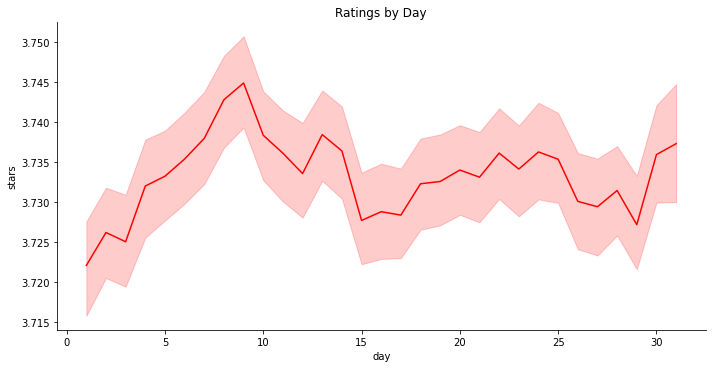

In [0]:
g = sns.relplot(data=yelp_review, x='day', y='stars', aspect=2, kind='line',color='red')
ax = plt.gca()
ax.set_title('Ratings by Day')

We infer that  inbetween 5th to 10th day is max ratings stars . But if we look at the y-scale, change is not so significant to draw a trend.

TREND OF TOTAL REVIEW COUNT WITH HOURS(24)

Text(0.5, 1.0, 'Review Time')

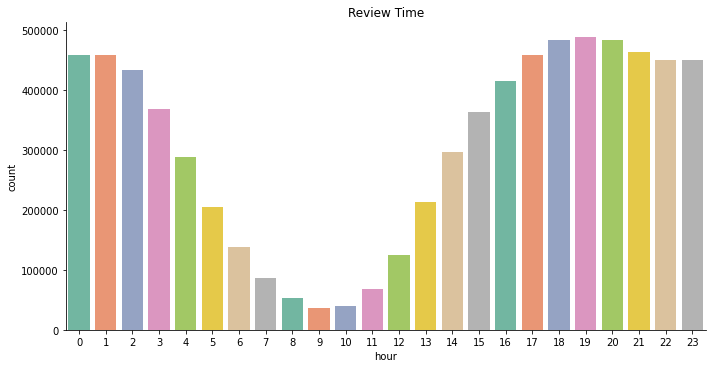

In [0]:
sns.catplot(data=yelp_review, x='hour', aspect=2, kind='count',palette=sns.color_palette("Set2"))
ax = plt.gca()
ax.set_title('Review Time')


This graphs gives the insight that  minimum number of reviews were given during the 7 am to 11 am morning and count keeps rising throughout the day which seems attractive. But maximum number of reviews were given at 7pm . It is possible tend to review in thier free time after their daily work is done.During 7 am to 11 am its decline  due to peak hours and people are getting ready for thier work.

In [0]:
useful_reviews = len(yelp_review[yelp_review["useful"]>0])
cool_reviews = len(yelp_review[yelp_review["cool"]>0])
funny_reviews = len(yelp_review[yelp_review["funny"]>0])
negative_reviews = len(yelp_review[yelp_review["stars"]<2])
positive_reviews =len(yelp_review[yelp_review["stars"]>3])
total_reviews = len(yelp_review)

print("Total reviews: {}".format(total_reviews))
print("Useful reviews: {}".format(useful_reviews))
print("Funny reviews: {}".format(funny_reviews))
print("Cool reviews: {}".format(cool_reviews))
print("Total negative reviews: {}".format(negative_reviews))
print("Total positive reviews: {}".format(positive_reviews))

Total reviews: 7323074
Useful reviews: 3277206
Funny reviews: 1349922
Cool reviews: 1644287
Total negative reviews: 1059862
Total positive reviews: 4867164


This review  has more number of positive reviews compared to the negative reviews.

##USER TABLE INSIGHT:

In [0]:
#load the dataset

yelp_users = pd.read_csv('user.csv')

In [0]:
yelp_users.head()

user_id       name  ...  compliment_writer compliment_photos
0  q_QQ5kBBwlCcbL1s4NVK3g       Jane  ...                323               NaN
1  dIIKEfOgo0KqUfGQvGikPg       Gabi  ...                294               NaN
2  D6ErcUnFALnCQN4b1W_TlA      Jason  ...                  1               NaN
3  JnPIjvC0cmooNDfsa9BmXg        Kat  ...                326               NaN
4  37Hc8hr3cw0iHLoPzLK6Ow  Christine  ...                 44               NaN

[5 rows x 21 columns]

Text(0.5, 1.0, 'Review count')

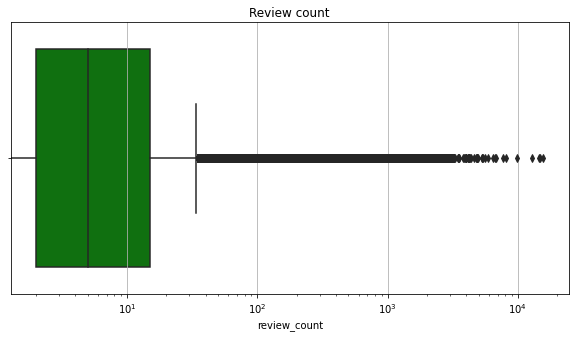

In [0]:
plt.figure(figsize=(10,5))
ax = plt.gca()
sns.boxplot(data=yelp_users, x='review_count', ax=ax,color='green')
ax.xaxis.grid(True)
plt.xscale('log')
plt.title("Review count")


The boxplot for review count reveals a lot of outliers. There are some users who have written over 10k reviews.

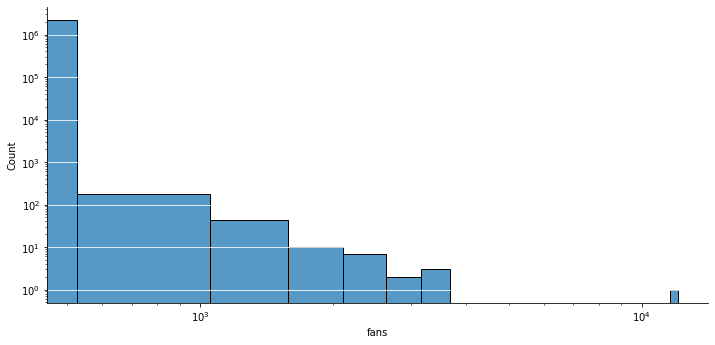

In [0]:
sns.displot(data=yelp_users, x='fans', aspect=2,palette=sns.color_palette("Set2"))
plt.gca()
plt.xscale('log')
plt.yscale('log')
plt.grid(False)
plt.grid(axis = 'y', color ='white', linestyle='-')

Some users are wildly popular reviewers on yelp. Most people have few or no fans.There are only few people who are having maximum fan following.

# Lets find relationship between users's friends and review patterns

In [0]:
top_users = 15
user_most_reviews = yelp_review.groupby(['user_id']).size().reset_index(name='counts')
top_users_ids = user_most_reviews.sort_values(['counts'])[::-1][:top_users].user_id.values

In [0]:
user_frnds = {}
for  users_id in top_users_ids:
    
    record = yelp_users.loc[yelp_users['user_id'] == users_id]
    user_frnds[users_id] = {}
    user_frnds[users_id]["name"]= record.name.values[0]
    user_frnds[users_id]["friends"]= record.friends.values[0]
    if record.friends is not "None":
        user_frnds[users_id]["friends_count"]= len(record.friends.values[0].split(","))
    else:
        user_frnds[users_id]["friends_count"]=0
    user_frnds[users_id]["review_count"]=record.review_count.values[0]
    user_frnds[users_id]["fans"]=record.fans.values[0]

In [0]:
 user_friend_df = pd.DataFrame.from_dict(data= user_frnds,orient="index")

In [0]:
user_friend_df.head()

name  ...  fans
RtGqdDBvvBCjcu5dUqwfzA    Shila  ...   296
Xwnf20FKuikiHcSpcEbpKQ  Kenneth  ...   283
tgrs5VQ6thhouiEtMU-N_w   Edward  ...   151
j14WgRoU_-2ZE1aw1dXrJg   Daniel  ...  2938
jpIGlAym6z88W2xzHiK5_A   Denise  ...   158

[5 rows x 5 columns]

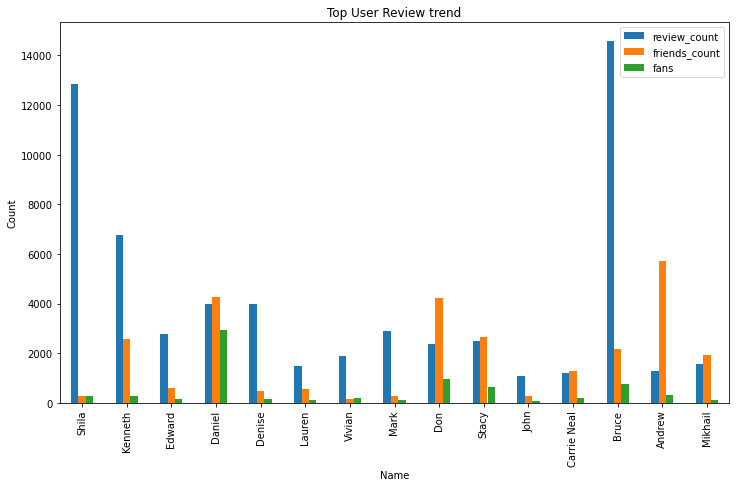

In [0]:
axes = user_friend_df.plot(x="name", y=["review_count", "friends_count", "fans"],
                           kind="bar",figsize=(12, 7))
plt.xlabel('Name', axes=axes)
plt.ylabel('Count', axes=axes)
plt.title('Top User Review trend'.format(business_name), axes=axes)
plt.show()

From above graph we can see there is no defined relashionship between user's fans, friends and review count. User reviewing for a business totally depends on user's character and/or satisfaction with business services.

# Does user's friends infulence business review?

Lets find trending business and its top users. Then we will cross check with yelp user database if a particular user's friend also has given rating to that business or not.

In [0]:
business_rank = 4 # 0 to 9
temp = yelp_review[["business_id",'year',"stars"]]
five_star_reviews = temp[temp["stars"]>4]
trending_business_reviews = five_star_reviews.groupby(["business_id",'year']).size().reset_index(name='counts')

business_id = trending_business_reviews.sort_values(['year','counts'])[::-1][:10].business_id.values[business_rank]
business_name = yelp_business.loc[yelp_business['business_id'] == business_id].name.values[0]

In [0]:
user_reviws = yelp_review.loc[yelp_review['business_id']==business_id]
topuser_reviws = user_reviws.groupby(['user_id']).size().reset_index(name='counts')
print("Total users who gave ratings to {} are {}".format(business_name,len(topuser_reviws)))

Total users who gave ratings to Chicken Fire are 180


In [0]:
top_users = 50 #len(topuser_reviws)// 10
topuser_reviws = topuser_reviws.sort_values(['counts'])[::-1][:top_users]

In [0]:
%%time

users_ids = topuser_reviws.user_id.values
users_ids = pd.merge(topuser_reviws,right=yelp_users, how="inner",on='user_id')
users_ids =users_ids [["name","user_id", "friends"]]


CPU times: user 3.73 s, sys: 888 ms, total: 4.62 s
Wall time: 4.61 s


In [0]:
%%time
def calc_frnd_review(frnds, business_id, yelp_review):
        frnds = frnds.split(',')
        # count reviews
        #frnds = yelp_users.loc[(yelp_users['user_id'].isin(frnds)) & (yelp_users["review_count"]>0 )].user_id.values
        friend_review = yelp_review.loc[(yelp_review['business_id']==business_id) &
                                        (yelp_review['user_id'].isin(frnds))
                                       ][["stars","user_id"]]
        friend_review_cnt = len(friend_review.user_id.values)
        if(friend_review_cnt>0):
            total_stars = friend_review.stars.sum()
        else:
            total_stars = 0
        return  friend_review_cnt,total_stars

users_ids[["frnd_count","total_stars"]]= users_ids["friends"].apply(lambda frnds: pd.Series(calc_frnd_review(frnds, business_id, yelp_review), index=['frnd_count','total_stars']))

CPU times: user 52.3 s, sys: 312 ms, total: 52.7 s
Wall time: 53.9 s


In [0]:
users_ids[users_ids["frnd_count"]>0]

name                 user_id  ... frnd_count  total_stars
20  Laura  HhpZBR_tDw-80-CDCCMTCw  ...        1.0          5.0
41  Jazzy  Q3zLMeLgmBpbFzp3yOoNcg  ...        1.0          5.0

[2 rows x 5 columns]

So we can see here, not much users could have been somehow influenced by their friends's top ratings to a business, because there is only one user whose friend also rated 5 star for "Laura" when "Jazzy" gave 5 rating to it (Here we have taken only 50  into account because this task is very resource heavy).

TIPS DATASET

In [0]:
yelp_tips = pd.read_csv('tip.csv')
yelp_tips.head()

text  ...                 date
0                               Carne asada chips...  ...  2011-07-22 19:07:35
1  Best happy hour from 3pm to 6pm! $1 off martin...  ...  2014-09-10 07:33:29
2  Nice people, skilled staff, clean location - b...  ...  2013-12-13 23:23:41
3  1/2-price bowling & the "Very" Old Fashion are...  ...  2017-07-11 23:07:16
4  Solid gold's. Great sauna. Great staff, too. E...  ...  2016-11-30 08:46:36

[5 rows x 5 columns]

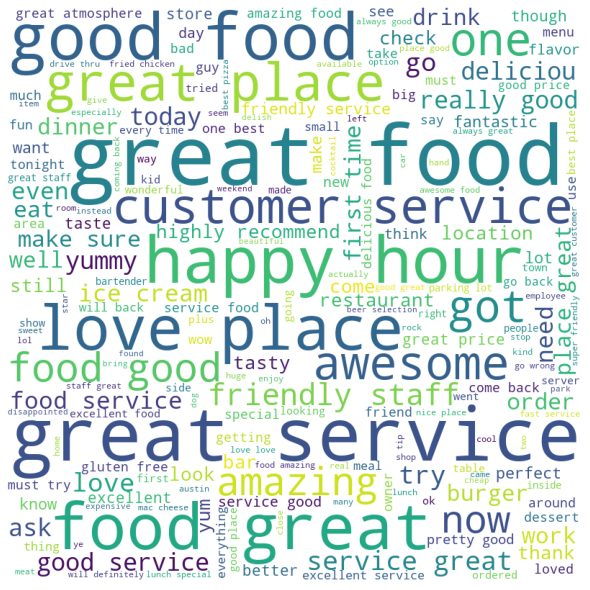

In [0]:

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in yelp_tips.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

This plot gives the most repeated words in tips. and we see that most of the words repeated have good reveiws about the resturants which asserts our assumption mostly people tend to write good review which gives happy customer

### **Handling Overlapping Categories** 
# There are many overlappying categories like food / resturants / bars / night life

In this section we tried to classify the overlapping categories by looking at thier attribute coloumn. Here we tried to form a relationship between Attributes and categories and we found that every bussiness in category nightlife has an attribute Good_for_meal_late_night and every bussiness with an a category bar has an attribute Alcohol which also makes sense so we first filtered the bussiness with food and resturants and then tried to classify then based on thier attributes.

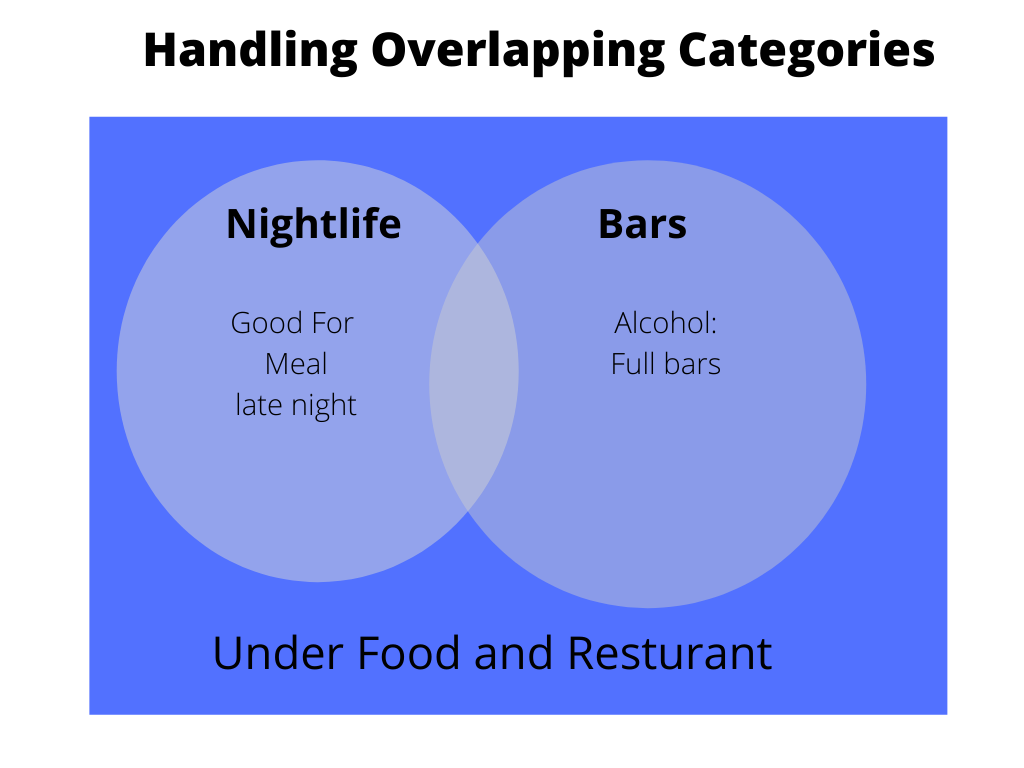)

In [0]:


import sqlite3 as sql
conn = sql.connect('yelp_database.db')
night_life=pd.read_sql("select count(*) from bussiness where GoodForMeal_latenight=1",conn)
bars_nightlife=pd.read_sql("select count(*) from bussiness where Alcohol like '%full_bar%' AND GoodForMeal_latenight=1",conn)
bars_only=pd.read_sql("select count(*) from bussiness where Alcohol like '%full_bar%' AND GoodForMeal_latenight=0",conn)
bars_only['count(*)'].values[0]
bars_nightlife=pd.read_sql("select count(*) from bussiness where Alcohol like '%full_bar%' AND GoodForMeal_latenight=1",conn)

In [0]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
labels1 = ["Full bars suitable for late night meal","Resturants suitable for late night meal"]
values1 = [bars_nightlife['count(*)'].values[0],night_life['count(*)'].values[0]-bars_nightlife['count(*)'].values[0]]
labels2 = ["Full bars suitable for late night meal","Full bars not suitable for late night meal"]
values2 = [bars_nightlife['count(*)'].values[0],bars_only['count(*)'].values[0]]
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels=labels1, values=values1, name="BARS in late night resturants"),1, 1)

fig.add_trace(go.Pie(labels=labels2, values=values2, name="Late night meal BARS",pull=[0.2, 0]),1, 2)

fig.update_traces(textposition='inside',hole=0.4,hoverinfo="label+percent+name")
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide',title_text="Classifying Nightlife and Bars",autosize=True,width=800,height=600,annotations=[dict(text='NightLife', x=0.14, y=0.5, font_size=12, showarrow=False),dict(text='Bars', x=0.82, y=0.5, font_size=12, showarrow=False)])
fig.show()

From this Pie chart we have tried to classify various overlapping categories.We infered every bussiness in category nightlife has an attribute Good_for_meal_late_night and every bussiness with an a category bar has an attribute Alcohol. 
cane see that Bussness In category "resturant and food" which are suitable for late night meal, 58% are Full bars which actually just 6.17% of the total bars

# Performing rule based sentiment analysis due to lack of labelled data of sentiment score:

This review score will be added instead of review text.
this will save a large memory and make  that large data coloumn interpretable as well

INSTALLING VADER

In [0]:
! pip install vaderSentiment

     |████████████████████████████████| 125 kB 5.3 MB/s 


In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
obj = SentimentIntensityAnalyzer()
sentence = "Ram is really good "
sentiment_dict = obj.polarity_scores(sentence)
v=list(sentiment_dict.values())
v[3]


Testing sentiment score : -1 for extremly negative +1 for extremly positive 0 for neutral

In [0]:
import csv
with open('review_sentiment.csv', 'w', newline='') as outcsv:
    writer = csv.writer(outcsv)
    writer.writerow(["review_id","review_score"])

writing sentiment score in the dataset

In [0]:
import json
i=0
with open('review_sentiment.csv', 'a') as csv_file:
  writer = csv.writer(csv_file)
  with open("yelp_academic_dataset_review.json", encoding="UTF-8") as json_file:
    for line in json_file:
      if i < 1000:
        data = json.loads(line)
        text=data['text']
        sentiment_dict = obj.polarity_scores(text)
        v=list(sentiment_dict.values())
        compound_score=v[3]

        writer.writerow([data['review_id'],compound_score])
        i=i+1                  

In [0]:
import pandas as pd
df_ = pd.read_csv('review_sentiment.csv')
df_new=df_.drop_duplicates()

In [0]:
df_new.head()

review_id  review_score
0  lWC-xP3rd6obsecCYsGZRg        0.9950
1  8bFej1QE5LXp4O05qjGqXA        0.9966
2  NDhkzczKjLshODbqDoNLSg        0.9705
3  T5fAqjjFooT4V0OeZyuk1w       -0.4386
4  sjm_uUcQVxab_EeLCqsYLg        0.9359

In [0]:
df_rev = pd.read_csv('review_2.csv')

In [0]:
df_rev.head()

review_id                 user_id  ... cool                 date
0  lWC-xP3rd6obsecCYsGZRg  ak0TdVmGKo4pwqdJSTLwWw  ...    1  2014-10-11 03:34:02
1  8bFej1QE5LXp4O05qjGqXA  YoVfDbnISlW0f7abNQACIg  ...    0  2015-07-03 20:38:25
2  NDhkzczKjLshODbqDoNLSg  eC5evKn1TWDyHCyQAwguUw  ...    0  2013-05-28 20:38:06
3  T5fAqjjFooT4V0OeZyuk1w  SFQ1jcnGguO0LYWnbbftAA  ...    1  2010-01-08 02:29:15
4  sjm_uUcQVxab_EeLCqsYLg  0kA0PAJ8QFMeveQWHFqz2A  ...    0  2011-07-28 18:05:01

[5 rows x 8 columns]

In [0]:
df_reviews_final=pd.merge(df_rev, df_new, on='review_id')

In [0]:
df_reviews_final.shape

(7323074, 9)

In [0]:
df_reviews_final.to_csv('final_review.csv')